In [40]:
using HorizonSideRobots
using PyPlot; pygui(true)
h = 10
w = 10
n = 2
r = Robot(h, w)
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\polya\.julia\packages\HorizonSideRobots\UumzG\src\HorizonSideRobots.jl:187


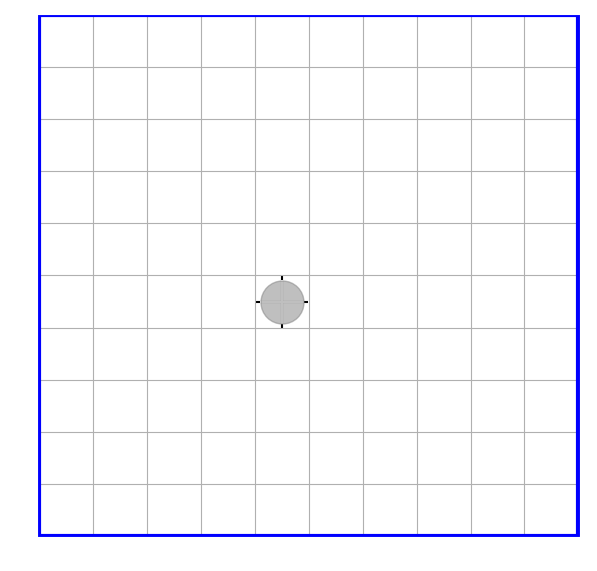

In [41]:
show(r)

In [42]:
function move_till_border(r, side)
    count = 0
    while(!isborder(r, side))
        move!(r, side)
        count+=1
    end
    return count
end

function inverse_side(side)
    return HorizonSide((Int(side) + 2) % 4)
end

function move_and_mark(r, x, y)
    if check(x, y)
        putmarker!(r)
    end
    while !isborder(r, Ost)
        x += 1
        move!(r, Ost)
        if check(x, y)
            putmarker!(r)
        end
    end
    move_till_border(r, West)
    x = 0
end

function check(x, y)
    return (div(x, n) + div(y, n)) % 2 == 0
end

function get_back(a, b)
    for i = 1:a
        move!(r, Ost)
    end
    for j = 1:b
        move!(r, Nord)
    end
end

function calc(r)
    count_y = move_till_border(r, Sud)
    count_x = move_till_border(r, West)
    x, y = 0, 0
    move_and_mark(r, x, y)
    while !isborder(r, Nord)
        move!(r, Nord)
        y += 1
        move_and_mark(r, x, y)
    end
    move_till_border(r, Sud)
    move_till_border(r, West)
    
    get_back(count_x, count_y)
end

calc(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\polya\.julia\packages\HorizonSideRobots\UumzG\src\HorizonSideRobots.jl:187


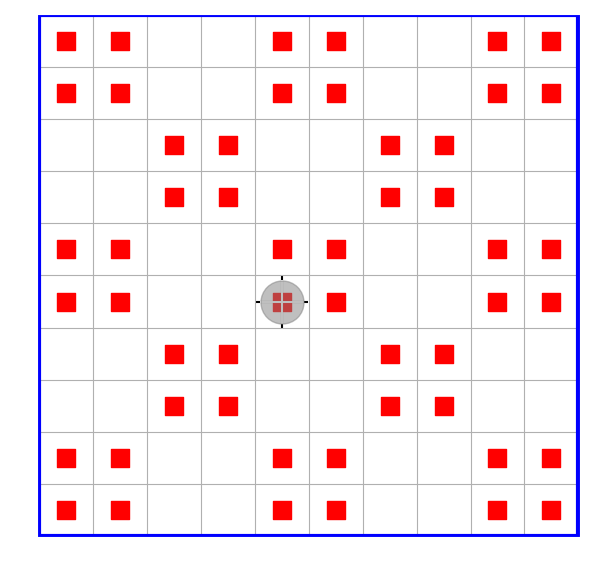

In [43]:
show(r)